In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train = r"VU_DM_data/training_set_VU_DM.csv"
df_train = pd.read_csv(train)

In [2]:
df_train.head(30)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
from sklearn.model_selection import train_test_split

## Imputing values for features with < 50 % missing values (orig_destination_distance, prop_location_score2, prop_review_score)
#### All values with > 50 % null/NAN will be excluded from modelling for now


## Imputing prop_location_score2

In [4]:
#prop_location_score2

df_train['prop_location_score2'].head()

0    0.0438
1    0.0149
2    0.0245
3    0.0125
4    0.1241
Name: prop_location_score2, dtype: float64

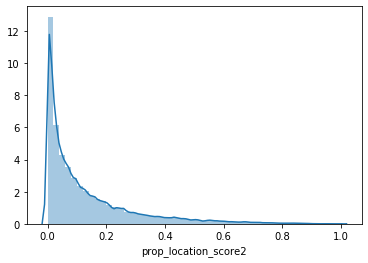

In [5]:
import seaborn as sns, numpy as np
#sns.set_theme(); np.random.seed(0)
x = df_train['prop_location_score2']
ax = sns.distplot(x)

In [6]:
#Gets score from the 25th quantile for each location
location_score_quant = df_train.groupby("prop_country_id")["prop_location_score2"].quantile(q=0.25)
location_score_quant

prop_country_id
1      0.06980
2      0.02600
4      0.01920
7      0.10175
9      0.05110
        ...   
224    0.05610
225    0.01300
226    0.08040
229    0.06410
230    0.02510
Name: prop_location_score2, Length: 172, dtype: float64

In [7]:

# takes ~28 minutes

import math
import time
start = time.time()
n = len(df_train)

for i in range(0,500000):
    if math.isnan(df_train.loc[i]['prop_location_score2']):
        country = df_train.loc[i]['prop_country_id']
        df_train.loc[i,'prop_location_score2'] = location_score_quant[country]
        
    if i%100000 == 0:
        print(f"passed {i} instances out of {n}")
        print("Time elapsed: ",time.time() - start)
df_train.head()


#for i in range(0,n):
    #df_train.loc[i,'extra_col'] = location_score_quant[df_train.loc[i]['prop_country_id']]
    #print(f"passed {i} instances out of {n}")
    #print("Time elapsed: ",time.time() - start)

passed 0 instances out of 4958347
Time elapsed:  0.0010418891906738281
passed 100000 instances out of 4958347
Time elapsed:  683.3521938323975
passed 200000 instances out of 4958347
Time elapsed:  1746.3867359161377
passed 300000 instances out of 4958347
Time elapsed:  2374.342992067337
passed 400000 instances out of 4958347
Time elapsed:  3027.874059200287


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [8]:
#If location_score_2 value is missing from instance, it is now assigned the 25th quantile score of that location
#df_train["prop_location_score2"].fillna(df_train["prop_location_score2_quantile"])

#Then remove the un-needed column
#df_train.drop('prop_location_score2_quantile', axis = 1, inplace = True)

## Imputing prop_review_score

In [9]:
df_train['prop_review_score'].describe()

count    4.950983e+06
mean     3.777777e+00
std      1.050329e+00
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: prop_review_score, dtype: float64

In [10]:
# Just imputing using median (very few missing values)
df_train["prop_review_score"].fillna(df_train["prop_review_score"].median(), inplace = True)

## Imputing orig_destination_distance	

In [11]:
df_train["orig_destination_distance"].describe()

count    3.350565e+06
mean     1.301234e+03
std      2.023951e+03
min      1.000000e-02
25%      1.398000e+02
50%      3.866000e+02
75%      1.500670e+03
max      1.166664e+04
Name: orig_destination_distance, dtype: float64

In [12]:
# Also just imputing using median
df_train["orig_destination_distance"].fillna(df_train["orig_destination_distance"].median(), inplace = True)

# Removing features

In [13]:
#Remove all competitor information
remove = []
for i in range(1,9):
  remove += ["comp%d_rate" % i, "comp%d_inv" % i, "comp%d_rate_percent_diff" % i]


#Remove other features with high % missing values
remove += ["srch_query_affinity_score","visitor_hist_adr_usd","visitor_hist_starrating"]

#Remove from dataframe:
print("Removed labels:\n")
for label in remove:
  print(label)
  df_train.drop(label, axis = 1, inplace = True)
    


Removed labels:

comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate
comp2_inv
comp2_rate_percent_diff
comp3_rate
comp3_inv
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate
comp5_inv
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate
comp8_inv
comp8_rate_percent_diff
srch_query_affinity_score
visitor_hist_adr_usd
visitor_hist_starrating


In [14]:
df_train.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,0,4,0,1,1,386.6,1,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,0,4,0,1,1,386.6,1,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,0,4,0,1,1,386.6,1,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,0,4,0,1,1,386.6,1,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,0,4,0,1,1,386.6,1,0,NaN,0


In [15]:
df_train

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,0,4,0,1,1,386.60,1,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,0,4,0,1,1,386.60,1,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,0,4,0,1,1,386.60,1,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,0,4,0,1,1,386.60,1,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,0,4,0,1,1,386.60,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,219,77700,3,4.0,1,1.61,...,21,3,0,1,0,550.92,0,0,NaN,0
4958343,332785,2013-06-30 19:55:18,5,219,219,88083,3,4.0,1,1.95,...,21,3,0,1,0,553.14,0,0,NaN,0
4958344,332785,2013-06-30 19:55:18,5,219,219,94508,3,3.5,1,1.10,...,21,3,0,1,0,544.43,0,0,NaN,0
4958345,332785,2013-06-30 19:55:18,5,219,219,128360,3,5.0,1,1.95,...,21,3,0,1,0,550.38,0,1,157.84,1


In [16]:
print(df_train['prop_location_score2'].isnull().sum())

980650


In [18]:
new_df = df_train.loc[0:500000]

In [19]:
new_df.head()

,srch_id,date_time,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,random_bool,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,219,893,3,3.5,1,2.83,...,0,4,0,1,1,386.6,1,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,219,10404,4,4.0,1,2.20,...,0,4,0,1,1,386.6,1,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,219,21315,3,4.5,1,2.20,...,0,4,0,1,1,386.6,1,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,219,27348,2,4.0,1,2.83,...,0,4,0,1,1,386.6,1,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,219,29604,4,3.5,1,2.64,...,0,4,0,1,1,386.6,1,0,NaN,0


In [20]:
print(new_df.isnull().sum())

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                   0
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2                0
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
orig_destination_distance           0
random_bool                         0
click_bool                          0
gross_bookings_usd             486096
booking_bool

In [21]:
#forgot to remove gross_bookings_usd
new_df.drop('gross_bookings_usd', axis = 1, inplace = True)

/Users/jerenolsen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
print(new_df.isnull().sum())

srch_id                        0
date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
click_bool                     0
booking_bool                   0
dtype: int64


In [23]:
new_df.to_csv('/Users/jerenolsen/desktop/preprocessed_train_data1.csv',index=False)